In [5]:
import pandas as pd

data = pd.read_csv('mall.csv')

print(data.head())
print(data.info())
print(len(data))
print(data['Gender'].unique())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
200
['Male' 'Female']


In [6]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
data['Gender'] = data['Gender'].astype(int)

#data = data.drop(columns='CustomerID')

print(f'age : [ {min(data['Age'])} : {max(data['Age'])} ]')
print(f'income : [{min(data['Annual Income (k$)'])}, {max(data['Annual Income (k$)'])}]')
print(f'spending : [{min(data['Spending Score (1-100)'])}, {max(data['Spending Score (1-100)'])}]')

print(data.info())
print(data.sample(5))

age : [ 18 : 70 ]
income : [15, 137]
spending : [1, 99]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
167         168       1   33                  86                      95
137         138       0   32                  73                      73
194         195       1   47                 120                      16
191         192       1   32                 103                      69
103         104       0   26                  62                      55


In [7]:
#stadard
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dat = scale.fit_transform(data)

dat = pd.DataFrame(dat, columns=data.columns)
print(dat.sample(8))

     CustomerID    Gender       Age  Annual Income (k$)  \
4     -1.654129  0.886405 -0.563369           -1.662660   
28    -1.238432  0.886405  0.082532           -1.204627   
83    -0.285792  0.886405  0.513132           -0.250391   
145    0.788093 -1.128152 -0.778669            0.627505   
165    1.134507  0.886405 -0.204535            0.932861   
57    -0.736131 -1.128152  2.163766           -0.632086   
96    -0.060623  0.886405  0.584899           -0.021375   
33    -1.151828 -1.128152 -1.496335           -1.051949   

     Spending Score (1-100)  
4                 -0.395980  
28                -0.745374  
83                -0.240694  
145                1.816849  
165                0.962775  
57                -0.163051  
96                -0.124229  
33                 1.622741  


In [8]:
dat = dat.drop(columns='Gender')

2 : 0.3185134408711024
3 : 0.3371428082096961
4 : 0.4140456252637291
5 : 0.4272395443393026
6 : 0.4390404164555763
7 : 0.42755568300559443
8 : 0.3795639558205468
9 : 0.35989499650755863
10 : 0.3679858722769945


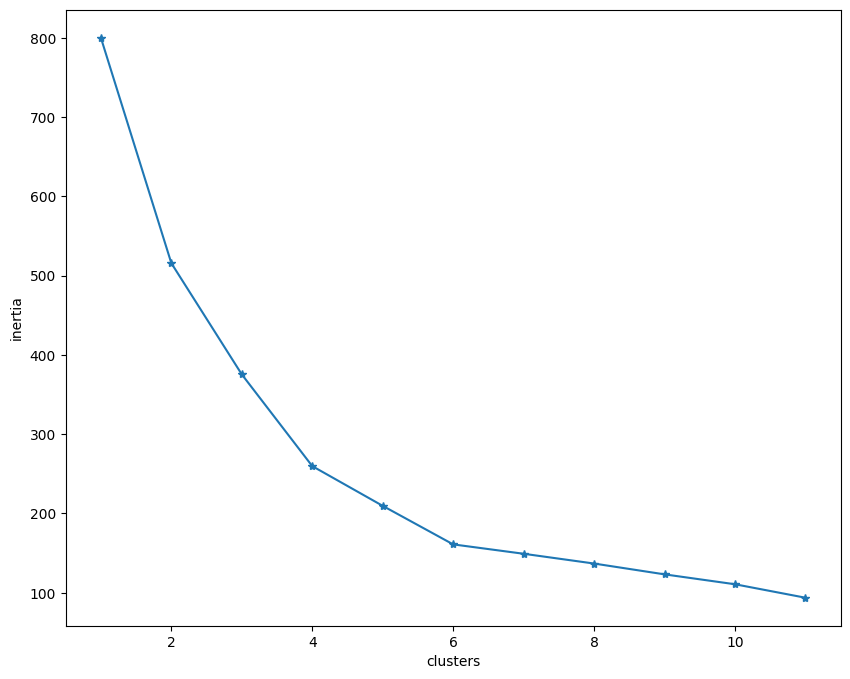

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k=[]
for i in range(1,12):
  m = KMeans(n_clusters=i, random_state=42 )
  m.fit(dat)
  k.append(m.inertia_)

for i in range(2,11):
  mod = KMeans(n_clusters=i, random_state=42)
  labels = mod.fit_predict(dat)
  si = silhouette_score(dat, labels)
  print(f'{i} : {si}')

plt.figure(figsize=(10,8))
plt.plot(range(1,12), k , marker='*')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

We notice that the best number of cluster to be taken is : **6 clusters**
from both methods( the elbow , and the silhouete score)

                        cluster        Age  Annual Income (k$)  \
0    High Income, High Spenders  41.685714           88.228571   
1     High Income, Low Spenders  32.692308           86.538462   
2      Low Income, Low Spenders  26.891892           57.135135   
3  Middle-Aged Average Spenders  56.340909           53.704545   
4       Young, Average Spenders  45.523810           26.285714   
5          Young, High Spenders  25.250000           25.833333   

   Spending Score (1-100)  
0               17.285714  
1               82.128205  
2               48.810811  
3               49.386364  
4               19.380952  
5               76.916667  


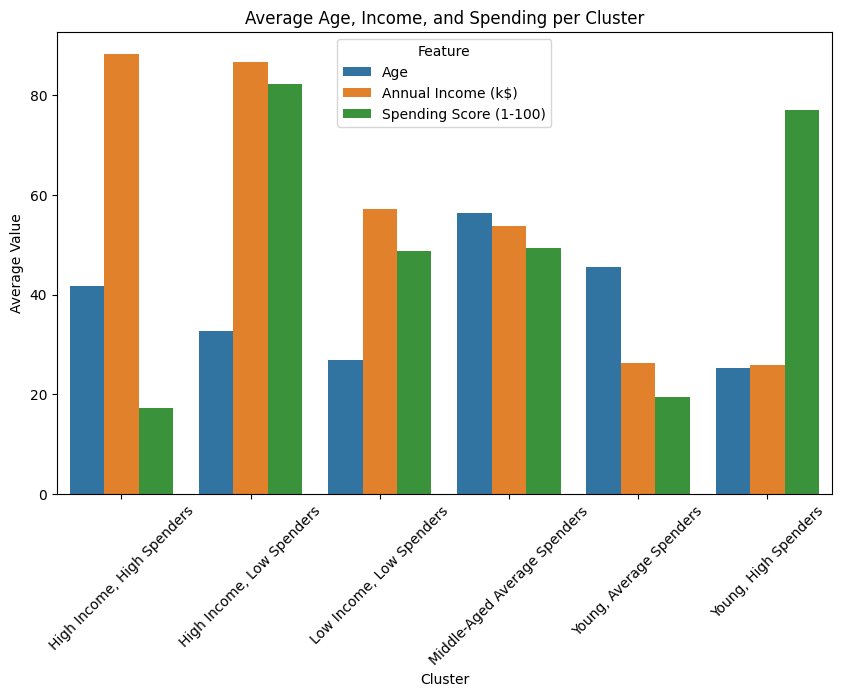

In [10]:
import seaborn as sns

model = KMeans(n_clusters=6, random_state=42)
data['cluster'] = model.fit_predict(dat)

labels = {
    0: "Middle-Aged Average Spenders",
    1: "High Income, Low Spenders",
    2: "Young, High Spenders",
    3: "High Income, High Spenders",
    4: "Young, Average Spenders",
    5: "Low Income, Low Spenders"
}
data['cluster'] = data['cluster'].map(labels)
re = data.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()
print(re)

re_ = re.melt(id_vars='cluster', var_name='Feature', value_name='Average')

plt.figure(figsize=(10,6))
sns.barplot(data=re_, x='cluster', y='Average', hue='Feature')
plt.title('Average Age, Income, and Spending per Cluster')
plt.xticks(rotation=45)
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='Feature')
plt.show()